In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import pandas as pd

def parallel_coordinates(data_sets, styles, ylim_list, plot_xticks=False, plot_legend=False):
    new_feature_names = ['Singlet\n-triplet\ngap', 'Oscillator\nstrength', 
                     'Abs. diff.\nof VEE', 'Activation\nenergy', 'Reaction\nenergy','Similarity\nto\nAripiprazole',
                       'Similarity\nto\nSildenafil', 'Similarity\nto\nCamphor', 'Similarity\nto\nMenthol',
                       'Similarity\nto\nFexofenadine', 'TPSA', 'logP', 'Similarity\nto\nRanolazine','TPSA', 'logP']
#     ylim_list = [(0.0198, 1.69), (-3.05, -0.000343), (0., 3.0), (-110, -78.5), (-14.2, 5.51),(0, 0.5),(0, 0.5),
#                  (0, 0.5),(0, 0.5),(0, 0.5), (80,500),(-15,2),(0, 0.5), (80,500), (3,9)]
    
    
    dims = len(data_sets[0])
    x = range(dims)
    fig, axes = plt.subplots(1, dims-1, sharey=False, figsize=(16.5,4.5))
    # Calculate the limits on the data
    min_max_range = list()
    for mn, mx in ylim_list:
        r = float(mx - mn)
        min_max_range.append((mn, mx, r))
    # Normalize the data sets
    norm_data_sets = list()
    for dimension, ds in enumerate(data_sets):
        nds = [(value - min_max_range[dimension][0]) / 
               min_max_range[dimension][2] 
               for dimension, value in enumerate(ds)]
        norm_data_sets.append(nds)
    data_sets = norm_data_sets
    # Plot the datasets on all the subplots
    for i, ax in enumerate(axes):
        for dsi, d in enumerate(data_sets):              
            if i in [2,4,6,8,11]:
                ax.plot([x[i], x[i+1]], [d[i], None], "white", linewidth=0.5)
            else:
                ax.plot([x[i], x[i+1]], [d[i], d[i+1]], styles[i][dsi], linewidth=0.5)
        ax.set_xlim([x[i], x[i+1]])
        if plot_xticks:
            ax.set_xticklabels([new_feature_names[i]], fontsize=11)
        else:
            ax.set_xticklabels([None])

    if plot_legend:
        ax.plot([], [], label='Successful', color="#ff7f0e", linewidth=0.5)
        ax.plot([], [], label='Failed', color="#00549e", linewidth=0.5)
        ax.legend( bbox_to_anchor=(1.0, 0.35), fontsize=14) # (x, y, width, height)

    # Plot the reference line
    ref_line = [0.571, -0.171, 0.1768, -87.0, -5.46, -0.20,-0.20,-0.20,-0.20, -0.40,-90,4, -0.30,-95,-7]
    norm_ref_line = [(value - min_max_range[dimension][0]) / 
                     min_max_range[dimension][2] 
                     for dimension, value in enumerate(ref_line)]
    for i, ax in enumerate(axes):
        if i in [2,4,6,8,11]:
            continue 
        else:
            ax.plot([x[i], x[i+1]], [norm_ref_line[i], norm_ref_line[i+1]], 'k--')

    # Set the x axis ticks 
    for dimension, (axx, xx) in enumerate(zip(axes, x[:-1])):
        axx.xaxis.set_major_locator(ticker.FixedLocator([xx]))
        ticks = len(axx.get_yticklabels())
        labels = list()
        step = min_max_range[dimension][2] / (ticks - 1)
        mn = min_max_range[dimension][0]
        for i in range(ticks):
            v = mn + i * step
            labels.append('%4.2f' % v)
        axx.set_ylim(0, 1)
        axx.set_yticks([0, norm_ref_line[dimension], 1])
        if dimension in [0, 2]:
            axx.set_yticklabels([ylim_list[dimension][0], ref_line[dimension], ylim_list[dimension][1]], fontsize=11)
        else:
            axx.set_yticklabels([-ylim_list[dimension][0], -ref_line[dimension], -ylim_list[dimension][1]], fontsize=11)
        axx.spines['top'].set_visible(False)
        axx.spines['bottom'].set_visible(False)
        
    # Adjust the final axis
    final_ax = plt.twinx(axes[-1])
    final_ax.xaxis.set_major_locator(ticker.FixedLocator([x[-1]]))
    final_ax.set_ylim(ylim_list[-1])
    final_ax.set_yticks([ylim_list[-1][0], ref_line[-1], ylim_list[-1][1]])
    final_ax.set_yticklabels([ylim_list[-1][0], ref_line[-1], ylim_list[-1][1]], fontsize=11)
    final_ax.spines['top'].set_visible(False)
    final_ax.spines['bottom'].set_visible(False)
    plt.subplots_adjust(wspace=0)

    return plt

def filter_rows(info, df, cutoff_dict):
    subdf = df[list(list(zip(*info))[0])]
    query = []
    for target, condition in info:
        cutoff = cutoff_dict[target]
        if condition == "maximize":
            query.append(f"`{target}` >= {cutoff}")
        elif condition == "minimize":
            query.append(f"`{target}` <= {cutoff}")
    return subdf.query(" and ".join(query))

WS


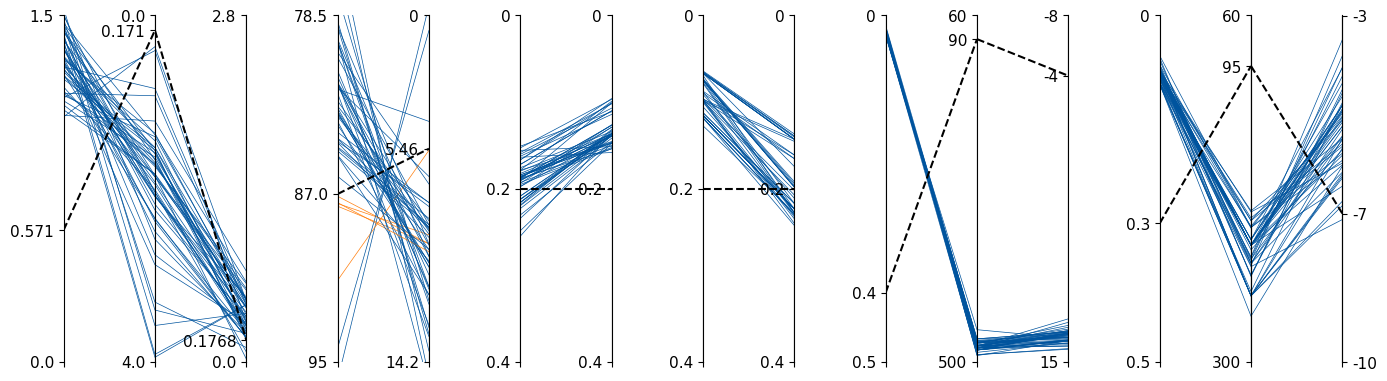

NMD


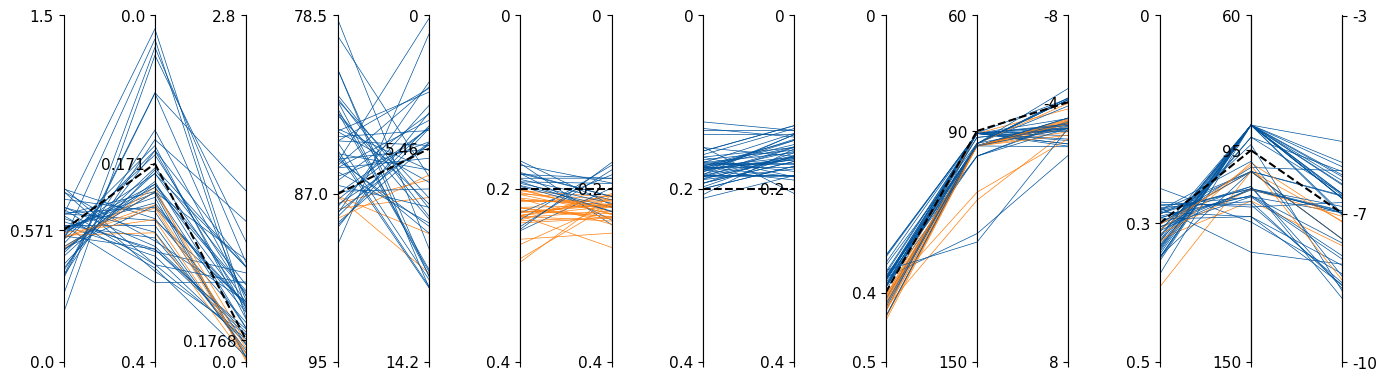

NMD-WS


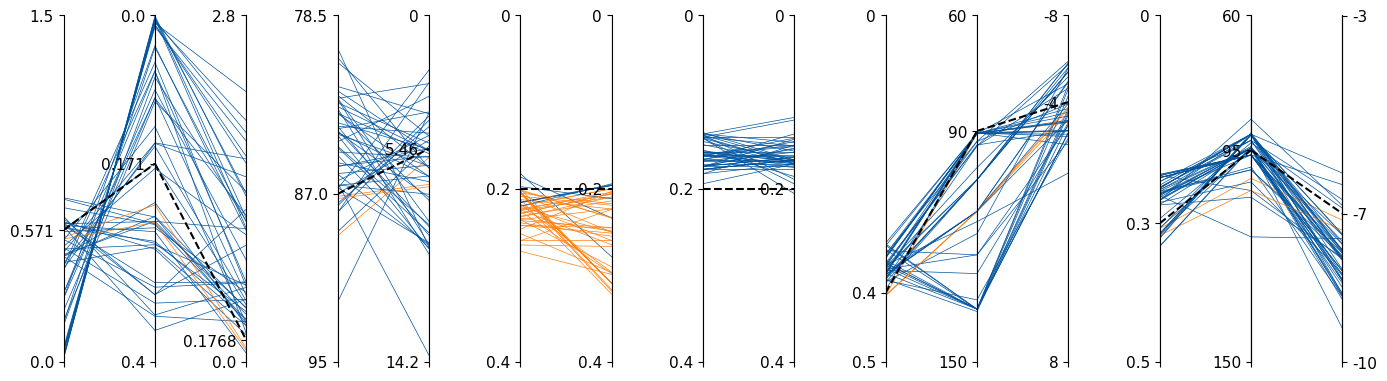

PIO


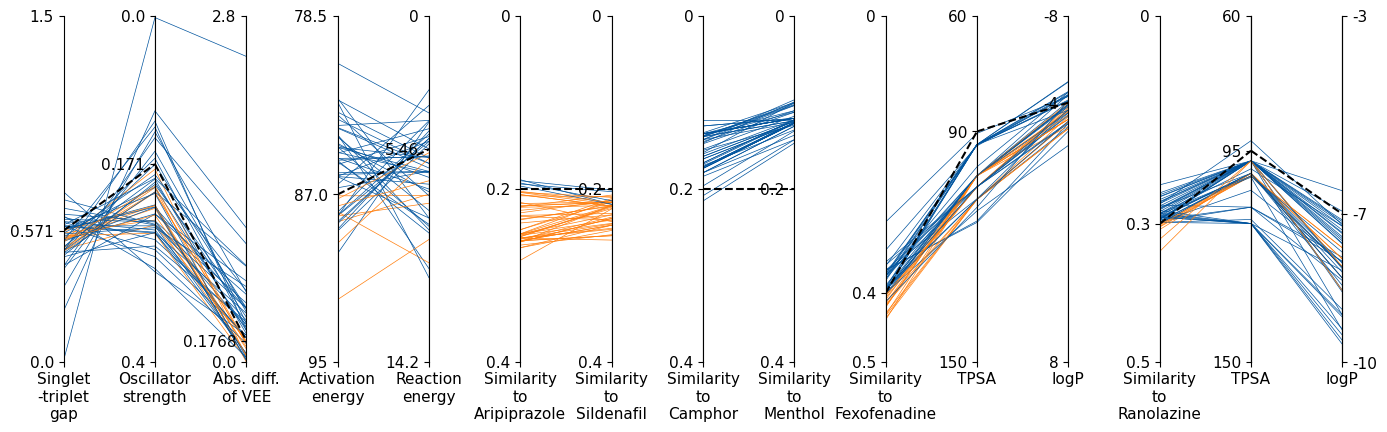

In [2]:
name_dict = {"janus_scaler":"WS", "janus_hybrid":"NMD-WS", "janus_uncertainty":"PIO", "janus_utopian":"NMD"}
all_targets = ['singlet-triplet value', 'oscillator strength', 'abs_diff_vee',
       'activation_energy', 'reaction_energy', 'similarity_Aripiprazole',
       'similarity_Sildenafil', 'similarity_Camphor', 'similarity_Menthol',
       'similarity_Fexofenadine', 'tpsa', 'logP', 'similarity_Ranolazine',
       'tpsa.1', 'logP.1']
new_feature_names = ['Singlet\n-triplet\ngap', 'Oscillator\nstrength', 
                 'Abs. diff.\nof VEE', 'Activation\nenergy', 'Reaction\nenergy','Similarity\nto\nAripiprazole',
                   'Similarity\nto\nSildenafil', 'Similarity\nto\nCamphor', 'Similarity\nto\nMenthol',
                   'Similarity\nto\nFexofenadine', 'TPSA', 'logP', 'Similarity\nto\nRanolazine','TPSA', 'logP']
cutoff_dict = {"singlet-triplet value":0.57068, "oscillator strength":0.1706886, "abs_diff_vee": 0.1768,
              "activation_energy": 86.96834, "reaction_energy": -5.46226,
              "similarity_Aripiprazole": 0.2, "similarity_Sildenafil": 0.2,
              "similarity_Camphor": 0.2, "similarity_Menthol": 0.2,
              "similarity_Fexofenadine":0.4, "tpsa":90, "logP": 4,
              "similarity_Ranolazine": 0.3, "tpsa.1": 95, "logP.1": 7}
info_list = [[("singlet-triplet value", "minimize"), ("oscillator strength", "maximize"), ("abs_diff_vee", "minimize")],
             [('activation_energy', "maximize"), ('reaction_energy', "minimize")],
             [('similarity_Aripiprazole', "maximize"), ('similarity_Sildenafil', "maximize")],
             [('similarity_Camphor', "maximize"), ('similarity_Menthol', "maximize")],
             [('similarity_Fexofenadine', "maximize"), ('tpsa', "maximize"), ('logP', "minimize")],
             [('similarity_Ranolazine', "maximize"), ('tpsa.1', "maximize"), ('logP.1', "maximize")]]

for k, method in enumerate(["janus_scaler","janus_utopian", "janus_hybrid", "janus_uncertainty"]):
    if method == "janus_scaler":
        ylim_list = [(0.0, 1.5), (-4.0, -0.0), (0., 2.8), (-95, -78.5), (-14.2, 0),(-0.4, 0),(-0.4, 0),
                 (-0.4, 0),(-0.4, 0),(-0.5, 0), (-500,-60),(-15,8),(-0.5, 0), (-300,-60), (-10,-3)]
    else:
        ylim_list = [(0.0, 1.5), (-0.4, -0.0), (0., 2.8), (-95, -78.5), (-14.2, 0),(-0.4, 0),(-0.4, 0),
                 (-0.4, 0),(-0.4, 0),(-0.5, 0), (-150,-60),(-8,8),(-0.5, 0), (-150,-60), (-10,-3)]
    df = pd.read_csv(f"figures/finals/parallel_coordinate_plots/{method}.csv")[all_targets]
    data = df.values.copy()
    data[:,1] = data[:,1]*(-1)
    data[:,3] = data[:,3]*(-1)
    data[:,5] = data[:,5]*(-1)
    data[:,6] = data[:,6]*(-1)
    data[:,7] = data[:,7]*(-1)
    data[:,8] = data[:,8]*(-1)
    data[:,9] = data[:,9]*(-1)
    data[:,10] = data[:,10]*(-1)
    data[:,12] = data[:,12]*(-1)
    data[:,13] = data[:,13]*(-1)
    data[:,14] = data[:,14]*(-1)
    
    styles = [] #dark blue: #00549e ; #orange: #ff7f0e  #F39C12
    for info in info_list:
        style = ["0"]*len(df)

        subdf = df[list(list(zip(*info))[0])]
        subdf_pass = filter_rows(info, subdf, cutoff_dict)
        subdf_fail = subdf.drop(subdf_pass.index)
#         print(subdf_pass.head())
#         print(subdf_fail.head())
#         break
        
        for idx in subdf_pass.index:
            style[idx] = "#ff7f0e"
        for idx in subdf_fail.index:
            style[idx] = "#00549e"
        
        for z in range(len(info)):
            styles.append(style)

    pc = parallel_coordinates(data, styles=styles, ylim_list=ylim_list, plot_xticks= k==3, plot_legend= False) #k==0
    if k == 3:
        pc.xticks(range(len(new_feature_names)), new_feature_names)
    else:
        pc.xticks(range(len(new_feature_names)), [None]*len(new_feature_names))
    print(name_dict[method])
#     if k == 0:
#         pc.legend(["Successful", "Failed"])
    pc.savefig(f"figures/finals/parallel_coordinate_plots/{k+1}_{name_dict[method]}.svg", format="svg", bbox_inches='tight')
    pc.show()